In [2]:
import tensorflow
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf = tensorflow.keras
(X_train, y_train), (X_test, y_test) = tf.datasets.mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = tf.utils.to_categorical(y_train)
y_test = tf.utils.to_categorical(y_test)

In [4]:
model = tf.models.Sequential()
model.add(tf.layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1),
                           activation='relu'))
model.add(tf.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.layers.Dropout(0.25))
model.add(tf.layers.Flatten())
model.add(tf.layers.Dense(128, activation='relu'))
model.add(tf.layers.Dropout(0.5))
model.add(tf.layers.Dense(10, activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [6]:
modelpath = './MNIST_MLP.hdf5'
checkpointer = tf.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                                            verbose=1, save_best_only=True)
early_stopping_callback = tf.callbacks.EarlyStopping(monitor='val_loss', 
                                                     patience=10)

In [7]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30,
                    batch_size=200, verbose=0, callbacks=[early_stopping_callback,
                                                          checkpointer])


Epoch 1: val_loss improved from inf to 0.08553, saving model to .\MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.08553 to 0.05727, saving model to .\MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.05727 to 0.05089, saving model to .\MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.05089 to 0.04433, saving model to .\MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.04433 to 0.04365, saving model to .\MNIST_MLP.hdf5

Epoch 6: val_loss did not improve from 0.04365

Epoch 7: val_loss did not improve from 0.04365

Epoch 8: val_loss improved from 0.04365 to 0.04252, saving model to .\MNIST_MLP.hdf5

Epoch 9: val_loss did not improve from 0.04252

Epoch 10: val_loss did not improve from 0.04252

Epoch 11: val_loss did not improve from 0.04252

Epoch 12: val_loss improved from 0.04252 to 0.04220, saving model to .\MNIST_MLP.hdf5

Epoch 13: val_loss did not improve from 0.04220

Epoch 14: val_loss did not improve from 0.04220

Epoch 15: val_loss did not improve from 0.04220

Epoch 16: v

In [8]:
print('\n Test Accuracy : %.4f'% (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 3s 8ms/step - loss: 0.0343 - accuracy: 0.9923

 Test Accuracy : 0.9923


In [9]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

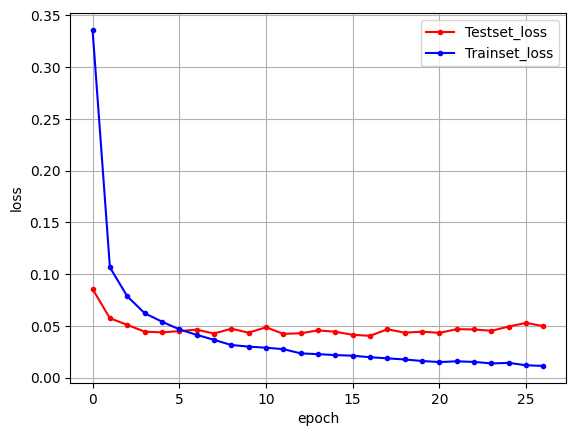

In [11]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()